In [838]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [839]:
df = pd.read_csv('data.csv')
df_2 = pd.read_csv('data2.csv')
df_3 = pd.read_csv('data3.csv')

# print(df_new)

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,2014.32
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.47
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,2014.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,2014.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,2015.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,2015.00


### KNeighborsRegressor to original df

In [ ]:
# X = df.drop(['price'], axis = 1, inplace = False)
y = df[["price"]]
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6752)
# Search the best n_neighbors value to choose from 1 to 10
n_neighbors = []
knn_score_list = []
for n in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn = knn.score(X_test, y_test)
    knn_score_list.append(knn)  
    n_neighbors.append(n) 
print(knn_score_list)
n_neighbors
# find the index of the highest value
max_index = np.argmax(knn_score_list)
# get the corresponding label
max_label = n_neighbors[max_index]
print(f"The n_neighbors with the highest knn_score is {max_label}")


[0.25517751417256285, 0.4266688773262922, 0.4905486214094186, 0.5131981603678757, 0.5217036549637721, 0.5349943963318078, 0.5309787638767336, 0.5296787982904009, 0.5268025798512307, 0.5271923836537684, 0.5283640726891363, 0.5298267311442775, 0.5298192226317417, 0.5252369229994825, 0.5251530272776073, 0.5217014617544498, 0.5193704459368669, 0.5172809694913204, 0.5161307686484007]
The n_neighbors with the highest knn_score is 6


In [ ]:
knn = KNeighborsRegressor(n_neighbors=max_label)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5349943963318078

#### **Preprocessing**
Les données ont besoin d'être transformée avant de pouvoir être utilisées dans un modèle de Machine Learning

In [ ]:
# initialisation
from sklearn.model_selection import train_test_split
y = df['price']
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

# pre-processing de X_train
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

# Entrainement sur X_train
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=4)
trained_model = model.fit(X_train_min_max,y_train)

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test)

# scoring
trained_model.score(X_test_min_max,y_test)

0.755752668315225

#### Pipeline

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,2014.32
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.47
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,2014.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,2014.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,2015.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,2015.00


In [ ]:
# Initialisation Pipeline
from sklearn.model_selection import train_test_split
y = df['price']
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

# simple = SimpleImputer(strategy='mean')   # replaces missing data by the mean
minmax = MinMaxScaler()
knn_4 = KNeighborsRegressor(n_neighbors=max_label)

pipe = Pipeline([
    #  ('simple_imputer', simple ),
     ('minmax', minmax),
     ('knn', knn)
])

In [ ]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

0.7588531476761058

### KNeighborsRegressor to cleaned df_new

In [ ]:
X = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'sqft_living15','sqft_lot15', 'age_house']]
#X = X
y = df_new[["price"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6752)

In [ ]:
# Search the best n_neighbors value to choose from 1 to 10
n_neighbors = []
knn_score_list = []
for n in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X_train, y_train)
    knn = knn.score(X_test, y_test)
    knn_score_list.append(knn)  
    n_neighbors.append(n) 
print(knn_score_list)
n_neighbors
# find the index of the highest value
max_index = np.argmax(knn_score_list)
# get the corresponding label
max_label = n_neighbors[max_index]
print(f"The n_neighbors with the highest knn_score is {max_label}")

[0.16871697856057133, 0.3670403483547455, 0.4279398801293275, 0.45747170629106615, 0.4812284109198737, 0.49603041002982007, 0.5013614766341854, 0.5085860528385867, 0.5088119804488029, 0.504518850410655, 0.5060031610643303, 0.5035797961792172, 0.5057599959860736, 0.5070494472392413, 0.5068886981024119, 0.5080855346713675, 0.505825812747342, 0.503375166915238, 0.5035259799879082]
The n_neighbors with the highest knn_score is 9


In [ ]:
# knn = KNeighborsClassifier(n_neighbors=max_label)
knn = KNeighborsRegressor(n_neighbors=max_label)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5088119804488029

In [ ]:
# knn.predict([[3,2,1000,11000,2,1,
#               1,1,1,750,0,900,
#               9000,20,10]])

#### A cause du danger du **`dataleaking`**
Sur le jeu de train, on veut créer les transformateurs, par exemple le min-max scaler permet de transformer toutes les données entre 0 et 1 en soustrayant par le minimum et en divisant par le maximum. Cependant ces deux valeurs sont celles du jeu de train, pas celles du jeu en entier, car on n’a pas le droit de se servir des données du test (data-leaking). Il faut donc:
- fit sur les valeurs trains et transform (d’ou fit-transform)
- uniquement faire transform sur les valeurs du test.

In [ ]:
# initialisation
from sklearn.model_selection import train_test_split
y = df_new['price']
X = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'sqft_living15','sqft_lot15', 'age_house']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,random_state=42)

# pre-processing de X_train
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
X_train_min_max = minmax.fit_transform(X_train)

# Entrainement sur X_train
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=max_label)
trained_model = model.fit(X_train_min_max,y_train)

# pre-processing de X_test
X_test_min_max = minmax.transform(X_test)

# scoring
trained_model.score(X_test_min_max,y_test)

0.6758173915957799

### En programmation, on aime bien factoriser alors on va créer un pipeline. 
On liste les étapes en leur donnannt à chaque fois un nom

In [ ]:
# Initialisation Pipeline
from sklearn.model_selection import train_test_split
y = df_new['price']
X = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'sqft_living15','sqft_lot15', 'age_house']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

#simple = SimpleImputer(strategy='mean')   # replaces missing data by the mean
minmax = MinMaxScaler()
knn_4 = KNeighborsRegressor(n_neighbors=max_label)

pipe = Pipeline([
     #('simple_imputer', simple ),
     ('minmax', minmax),
     ('knn', knn_4)
])

In [ ]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)


0.6758173915957799

#### Column Transformer

In [ ]:
# from sklearn.model_selection import train_test_split
# y = df_new['price']
# X = X
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# # On cree un pipeline de proprocessing pour les variables numériques
# numeric_features = X

# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import MinMaxScaler

# from sklearn.impute import SimpleImputer

# numeric_transformer = Pipeline([
#         ('imputer', SimpleImputer(strategy='mean')),
#         ('min_max', MinMaxScaler()),  # moyenne nulle et écart type = 1 -> Reg, SVM, PCA
#         ])

# # # On cree un pre-processeur pour les variables catégorielles
# # categorial_features = [ "zipcode"]

# # from sklearn.preprocessing import OneHotEncoder
# # categorical_transformer = OneHotEncoder(sparse=True)


# # a l'aide de la classe ColumnTransformer, 
# # on déclare à quelles variables on applique quel transformer
# from sklearn.compose import ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         # ('cat', categorical_transformer, categorial_features)
#     ]
# )


# #On obtient un pipeline de preprocessing qu'on peut utiliser dans un pipeline d'entainement
# from sklearn.neighbors import KNeighborsRegressor
# knn_4 = KNeighborsRegressor(n_neighbors=max_label)

# pipe = Pipeline([
#      ('prep', preprocessor),
#      ('knn', knn_4)
# ])

In [ ]:
# # Entrainement sur X_train
# trained_pipe = pipe.fit(X_train,y_train)

# # prediction sur X_test
# trained_pipe.predict(X_test)

# # scoring sur X_test
# trained_pipe.score(X_test,y_test)

### KNeighborsRegressor to cleaned df_2

In [ ]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,2014.32
std,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.47
min,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,2014.00
25%,321950.00,3.00,1.75,1427.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,2014.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,2014.00
75%,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,2015.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,2015.00


In [ ]:
df_2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,done_reno,year_sold,age_house
count,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,...,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00,21436.00
mean,4580765328.18,541649.96,3.37,2.12,2082.70,15135.64,1.50,0.01,0.24,3.41,...,1971.10,84.73,98077.86,47.56,-122.21,1988.31,12785.96,0.04,2014.33,43.23
std,2876589633.67,367314.93,0.91,0.77,919.15,41538.62,0.54,0.09,0.77,0.65,...,29.39,402.43,53.47,0.14,0.14,685.70,27375.47,0.20,0.47,29.39
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,...,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,0.00,2014.00,-1.00
25%,2123700078.75,324866.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,...,1952.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00,0.00,2014.00,17.00
50%,3904921185.00,450000.00,3.00,2.25,1920.00,7614.00,1.50,0.00,0.00,3.00,...,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,0.00,2014.00,39.00
75%,7308675062.50,645000.00,4.00,2.50,2550.00,10696.25,2.00,0.00,0.00,4.00,...,1997.00,0.00,98117.00,47.68,-122.12,2370.00,10087.25,0.00,2015.00,63.00
max,9900000190.00,7700000.00,11.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,...,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1.00,2015.00,115.00


In [ ]:
# Initialisation Pipeline
from sklearn.model_selection import train_test_split
y = df_2['price']
X = df_2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

#simple = SimpleImputer(strategy='mean')   # replaces missing data by the mean
minmax = MinMaxScaler()
knn = KNeighborsRegressor(n_neighbors=max_label)

pipe = Pipeline([
     #('simple_imputer', simple ),
     ('minmax', minmax),
     ('knn', knn)
])

KeyError: "['year'] not in index"

In [ ]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)


0.750602801367432

### **Linear Regression Model to df**

In [ ]:
# Initialisation Pipeline
from sklearn.model_selection import train_test_split
y = df['price']
X = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors','waterfront', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

# simple = SimpleImputer(strategy='mean')   # replaces missing data by the mean
minmax = MinMaxScaler()
linear_model = LinearRegression()

pipe = Pipeline([
     # ('simple_imputer', simple ),
     ('minmax', minmax),
     ('linear_model', linear_model)
])

In [ ]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)


0.7026873921712173

### **Linear Regression Model to cleaned df**

In [ ]:
# Initialisation Pipeline
from sklearn.model_selection import train_test_split
y = df_new['price']
X = df_new[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot','floors', 'view', 'condition', 'grade', 'sqft_above','sqft_basement', 'sqft_living15','sqft_lot15', 'age_house']]


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)


# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

# simple = SimpleImputer(strategy='mean')   # replaces missing data by the mean
minmax = MinMaxScaler()
linear_model = LinearRegression()

pipe = Pipeline([
     # ('simple_imputer', simple ),
     ('minmax', minmax),
     ('linear_model', linear_model)
])

In [ ]:
# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)


0.631824135180497

In [ ]:
# Simple Linear Model

linear_model = LinearRegression()
linear_model.fit(X_train_std, y_train)



LinearRegression()

In [ ]:
print('Intercept: {}'.format(linear_model.intercept_))
print('Columns: {}'.format(X_train.columns))
print('Coefficients: {}'.format(linear_model.coef_))

Intercept: -504307.1597974545
Columns: Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'sqft_living15',
       'sqft_lot15', 'age_house'],
      dtype='object')
Coefficients: [-427207.56919602  309472.13245245  589007.41761978    2151.30697192
   80903.65909751  283406.09010705   78589.35802974 1239267.2261669
  479182.27211972  257530.80199885  184998.70846354 -456867.75952943
  413794.72514   ]


In [ ]:
# Return the coefficient of determination R^2 of the prediction.
linear_score = linear_model.score(X_train_std, y_train)
linear_score

0.6421423024328894

In [ ]:
# Use the scaled test data to generate the prediction price
y_pred_linear = linear_model.predict(X_test_std_df_new)

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:


# Calculate the mean-squared error
linear_mse = metrics.mean_squared_error(y_test, y_pred_linear)
linear_mse



46466671143.11312

In [ ]:
# just want to demostrate the answer will be one because the output is generated by the model
linear_model.score(X_test_std_df_new, y_pred_linear) 

/home/apprenant/miniconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


1.0

In [ ]:
# linear_model.predict([[3,2,1000,11000,2,1,
#               1,1,1,750,0,900,
#               9000,20,10,1]])

In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
n_rows = 60
y_pred_linear_df_new = pd.DataFrame(y_pred_linear, columns = ['linear_pred']) 
model_results = pd.concat([y_test.reset_index(), y_pred_linear_df_new], axis = 1, sort = False) 
model_results.head(n_rows)

,index,price,linear_pred
0,19847,384000.00,346734.96
1,16533,234950.00,239467.14
2,554,331500.00,342147.49
3,14297,438000.00,368230.49
4,6151,287000.00,389391.74
5,16950,889000.00,939132.84
6,16091,400000.00,496403.12
7,15967,370000.00,262136.58
8,5996,295000.00,540888.48
9,16221,400000.00,472104.55


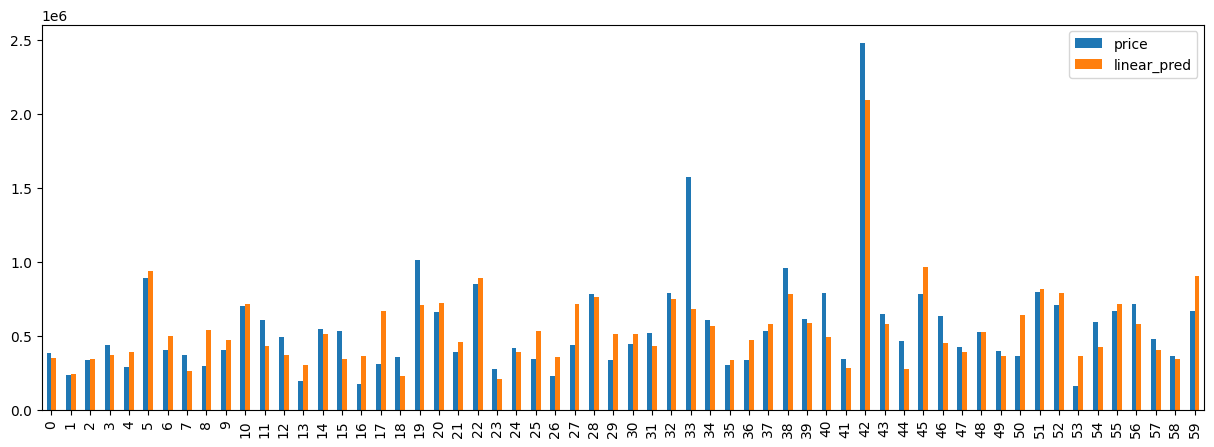

In [ ]:
model_results[['price', 'linear_pred']].head(n_rows).plot.bar(figsize = (15, 5))
plt.show()

In [ ]:
# Scaling
# Since the features are in different scale, we want to scale the features before we train the model.
# Create the Scaler object
std_scaler = preprocessing.MinMaxScaler()
# apply the transformation to the training data
X_train_std = std_scaler.fit_transform(X_train) 
# apply the transformation to the testing data
X_test_std = std_scaler.transform(X_test) # but we only transform our testing data with already fit scaler
# convert resulting array back to dataframe
X_test_std_df_new = pd.DataFrame(X_test_std, columns = X_train.columns)
X_test_std_df_new.head()
#-------------------------------------
# Simple Linear Model
linear_model = LinearRegression()
linear_model.fit(X_train_std, y_train)
# -----------------------------------
# Return the coefficient of determination R^2 of the prediction.
linear_score = linear_model.score(X_train_std, y_train)
linear_score


0.6421423024328894

In [ ]:
#pipeline
# Création du pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

# simple = SimpleImputer(strategy='mean')   # replaces missing data by the mean
minmax = MinMaxScaler()
linear_model = LinearRegression()

pipe = Pipeline([
     # ('simple_imputer', simple ),
     ('minmax', minmax),
     ('linear_model', linear_model)
])


# Entrainement sur X_train
trained_pipe = pipe.fit(X_train,y_train)

# prediction sur X_test
trained_pipe.predict(X_test)

# scoring sur X_test
trained_pipe.score(X_test,y_test)

0.631824135180497